# Assignment Scenario
You have just been hired by a US Venture Capital firm as a data analyst.

The company is considering foreign grain markets to help meet its supply chain requirements for its recent investments in the microbrewery and microdistillery industry, which is involved with the production and distribution of craft beers and spirits.

Your first task is to provide a high level analysis of crop production in Canada. Your stakeholders want to understand the current and historical performance of certain crop types in terms of supply and price volatility. For now they are mainly interested in a macro-view of Canada's crop farming industry, and how it relates to the relative value of the Canadian and US dollars.

# Introduction

Using this R notebook you will:

1.  Understand four datasets 
2.  Load the datasets into four separate tables in a Db2 database
3.  Execute SQL queries unsing the RODBC R package to answer assignment questions 

You have already encountered two of these datasets in the previous practice lab. You will be able to reuse much of the work you did there to prepare your database tables for executing SQL queries.

# Understand the datasets

To complete the assignment problems in this notebook you will be using subsetted snapshots of two datasets from Statistics Canada, and one from the Bank of Canada. The links to the prepared datasets are provided in the next section; the interested student can explore the landing pages for the source datasets as follows:

1.  <a href="https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMRP0203ENSkillsNetwork890-2022-01-01&pid=3210035901">Canadian Principal Crops (Data & Metadata)</a>
2.  <a href="https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMRP0203ENSkillsNetwork890-2022-01-01&pid=3210007701">Farm product prices (Data & Metadata)</a>
3.  <a href="https://www.bankofcanada.ca/rates/exchange/daily-exchange-rates?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMRP0203ENSkillsNetwork890-2022-01-01">Bank of Canada daily average exchange rates</a>


### 1. Canadian Principal Crops Data *

This dataset contains agricultural production measures for the principle crops grown in Canada, including a breakdown by province and teritory, for each year from 1908 to 2020.

For this assignment you will use a preprocessed snapshot of this dataset (see below).

A detailed description of this dataset can be obtained from the StatsCan Data Portal at:
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210035901  
Detailed information is included in the metadata file and as header text in the data file, which can be downloaded - look for the 'download options' link.  

### 2. Farm product prices

This dataset contains monthly average farm product prices for Canadian crops and livestock by province and teritory, from 1980 to 2020 (or 'last year', whichever is greatest).

For this assignment you will use a preprocessed snapshot of this dataset (see below).

A description of this dataset can be obtained from the StatsCan Data Portal at:
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210007701 
The information is included in the metadata file, which can be downloaded - look for the 'download options' link.  

### 3. Bank of Canada daily average exchange rates *

This dataset contains the daily average exchange rates for multiple foreign currencies. Exchange rates are expressed as 1 unit of the foreign currency converted into Canadian dollars. It includes only the latest four years of data, and the rates are published once each business day by 16:30 ET.

For this assignment you will use a snapshot of this dataset with only the USD-CAD exchange rates included (see next section). We have also prepared a monthly averaged version which you will be using below.

A brief description of this dataset and the original dataset can be obtained from the Bank of Canada Data Portal at:
https://www.bankofcanada.ca/rates/exchange/daily-exchange-rates/

( * these datasets are the same as the ones you used in the practice lab)

### Dataset URLs

  1.  Annual Crop Data: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Annual_Crop_Data.csv 

  2.  Farm product prices: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Monthly_Farm_Prices.csv
  
  3.  Daily FX Data: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Daily_FX.csv
  
  4.  Monthly FX Data: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Monthly_FX.csv
  

<span style="color:red">**IMPORTANT:**</span> You will be loading these datasets directly into R data frames from these URLs instead of from the StatsCan and Bank of Canada portals. The versions provided at these URLs are simplified and subsetted versions of the original datasets.

#### Now let's load these datasets into four separate Db2 tables.
Let's first load the RODBC package:

For Some reason I am not able to connect IBM DB2 using Kaggle R notebook as the driver required is not installed. Therefore I will be using an image for the R code as done on my personal computer using jupyter R notebook and then I will be using Python for running the code on Kaggle.

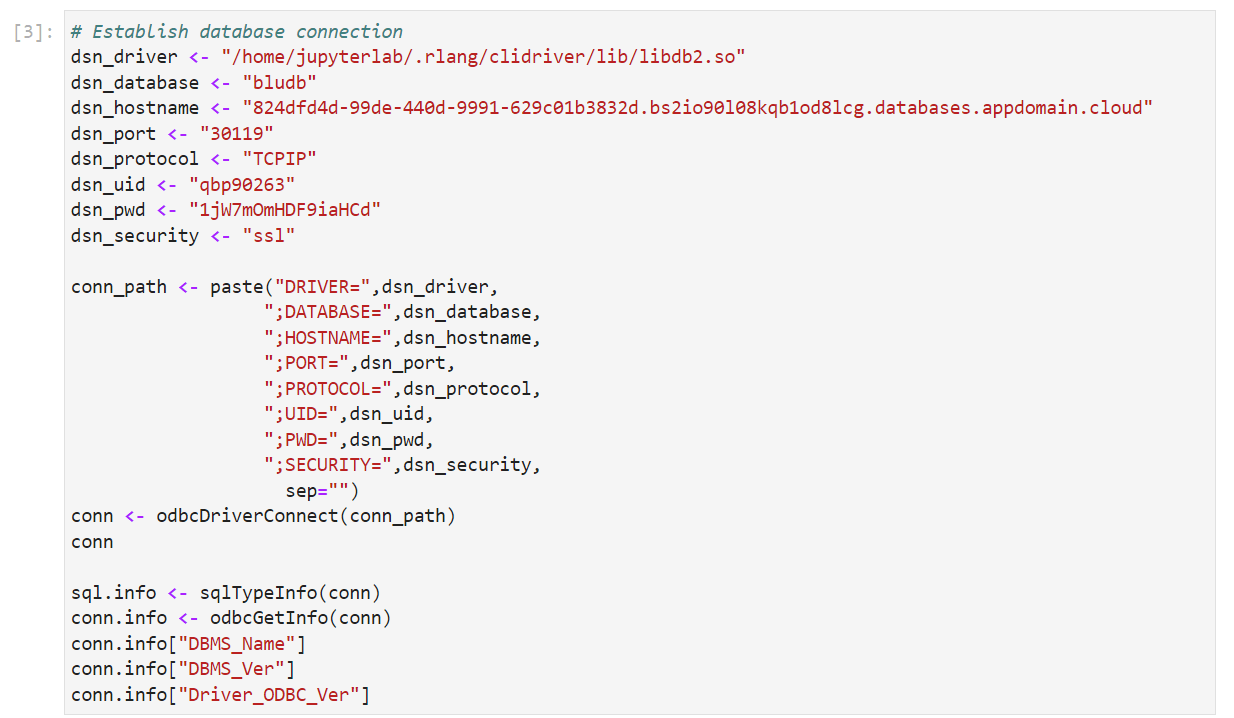

In [1]:
# Install Package
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.7
#Load Package
import ibm_db
import pandas

  Using cached ibm_db-3.1.0-cp310-cp310-linux_x86_64.whl
  Using cached ibm_db_sa-0.3.7-py3-none-any.whl
  Using cached SQLAlchemy-2.0.19-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.7 MB)
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
  Using cached greenlet-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (613 kB)
  Attempting uninstall: ibm_db
    Found existing installation: ibm-db 3.1.0
    Uninstalling ibm-db-3.1.0:
      Successfully uninstalled ibm-db-3.1.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.6.3
ERROR: Cannot uninstall typing-extensions 4.6.3, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps typing-extensions==4.6.3'.


In [2]:
# Define database connection 
dsn_database = "bludb"           
dsn_uid      = "qbp90263"            
dsn_pwd      = "1jW7mOmHDF9iaHCd"           
dsn_hostname = "824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud"          
dsn_port     = "30119"              
dsn_protocol = "TCPIP"             
dsn_driver   = "IBM DB2 ODBC DRIVER" # Don't change
dsn_security = "SSL"

In [3]:
#Create database connection
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  bludb as user:  qbp90263 on host:  824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud


## Problem 1
#### Create tables
Establish a connection to the Db2 database, and create the following four tables using the RODBC package in R. 
Use the separate cells provided below to create each of your tables.

1.  **CROP_DATA**
2.  **FARM_PRICES**
3.  **DAILY_FX**
4.  **MONTHLY_FX**  

The previous practice lab will help you accomplish this.

### Solution 1

Images for R code to creating tables

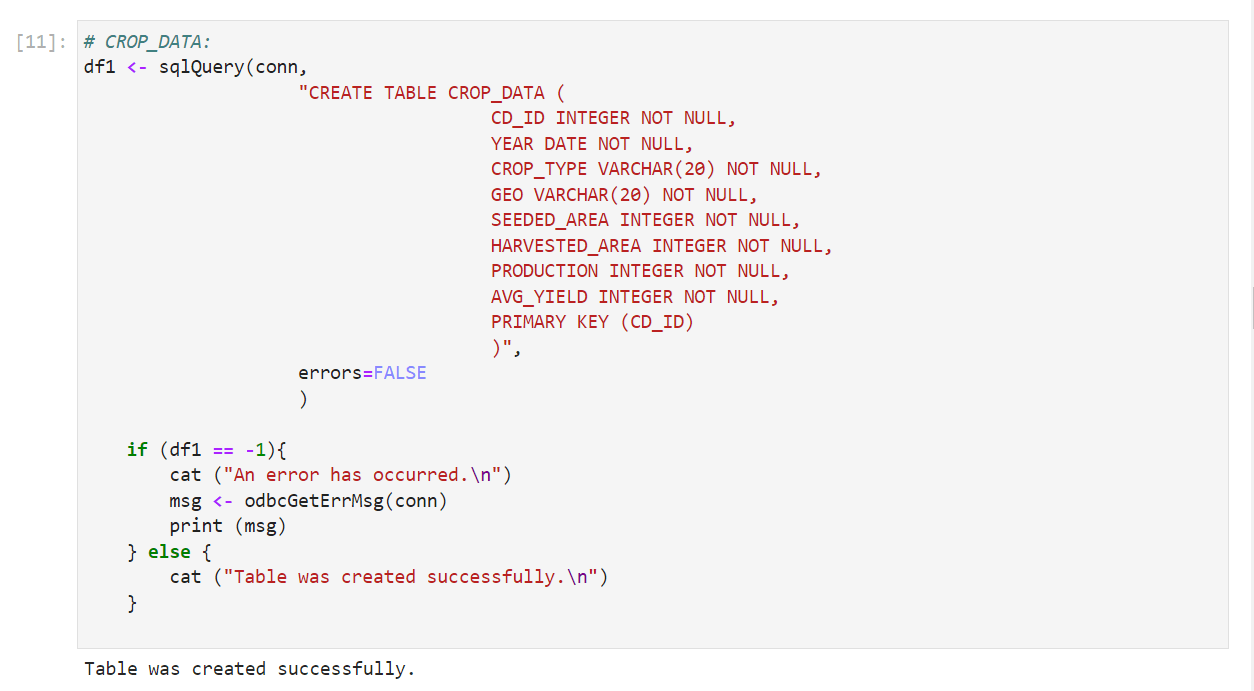
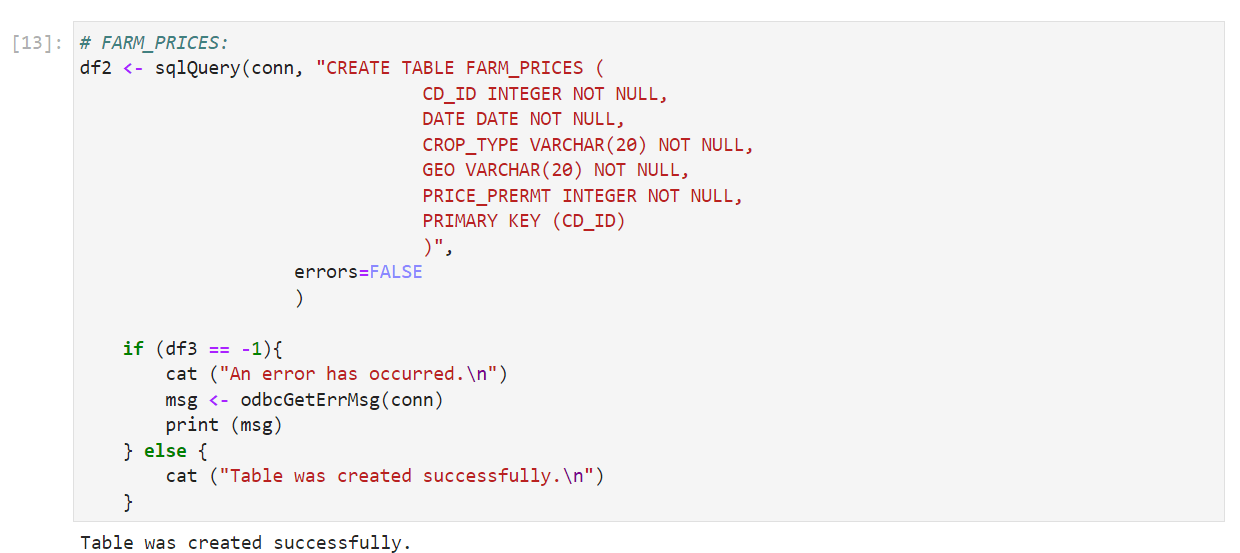
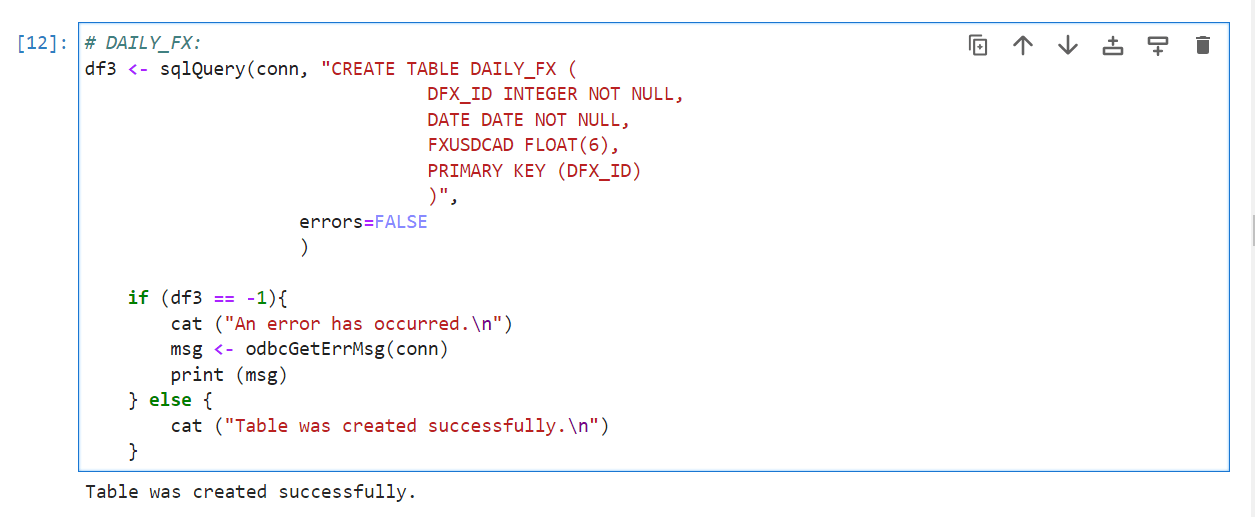
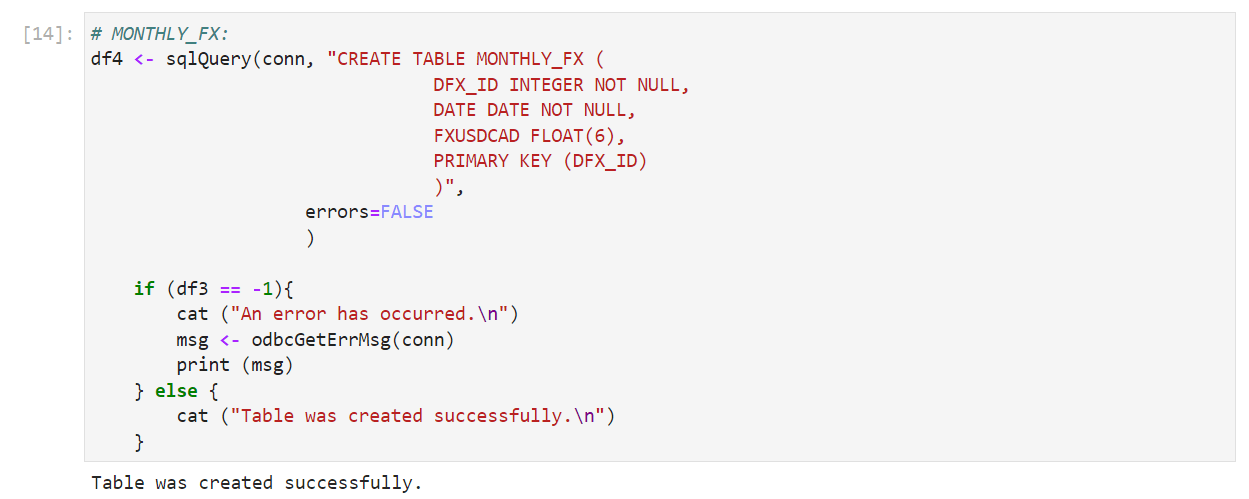

In [4]:
# CROP_DATA
Query = "CREATE TABLE CROP_DATA (CD_ID INTEGER NOT NULL,YEAR DATE NOT NULL,CROP_TYPE VARCHAR(20) NOT NULL,GEO VARCHAR(20) NOT NULL, SEEDED_AREA INTEGER NOT NULL,HARVESTED_AREA INTEGER NOT NULL,PRODUCTION INTEGER NOT NULL,AVG_YIELD INTEGER NOT NULL,PRIMARY KEY (CD_ID))"

create = ibm_db.exec_immediate(conn, Query)

In [5]:
# FARM_PRICES:
Query = "CREATE TABLE FARM_PRICES (CD_ID INTEGER NOT NULL, DATE DATE NOT NULL, CROP_TYPE VARCHAR(20) NOT NULL,GEO VARCHAR(20) NOT NULL,PRICE_PRERMT INTEGER NOT NULL,PRIMARY KEY (CD_ID))"

create = ibm_db.exec_immediate(conn, Query)

In [6]:
# DAILY_FX:
Query = "CREATE TABLE DAILY_FX (DFX_ID INTEGER NOT NULL,DATE DATE NOT NULL,FXUSDCAD FLOAT(6),PRIMARY KEY (DFX_ID))"

create = ibm_db.exec_immediate(conn, Query)

In [7]:
# MONTHLY_FX:
Query = "CREATE TABLE MONTHLY_FX (DFX_ID INTEGER NOT NULL,DATE DATE NOT NULL, FXUSDCAD FLOAT(6),PRIMARY KEY (DFX_ID))"

create = ibm_db.exec_immediate(conn, Query)

## Problem 2
#### Read Datasets and Load Tables
Read the datasets into R dataframes using the urls provided above. Then load your tables.

###  Solution 2

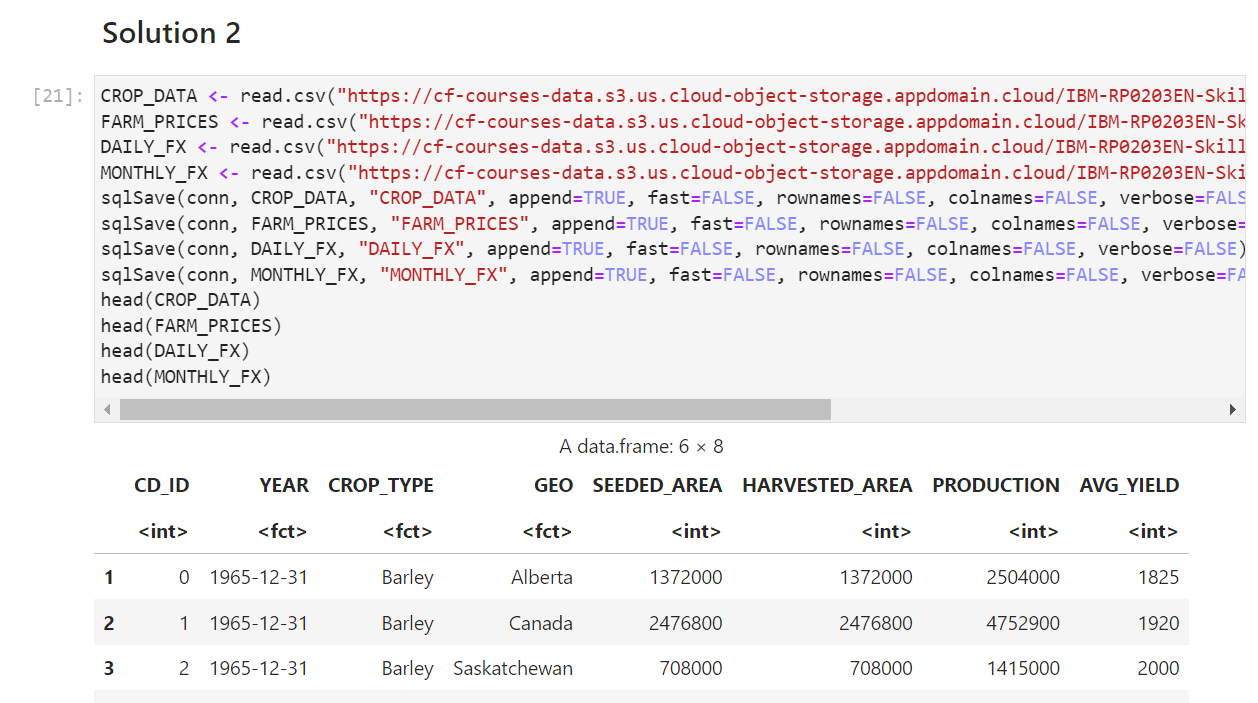

In [8]:
# Load CROP_DATA into Python

CROP_DATA = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Annual_Crop_Data.csv", dtype={"YEAR": str})
CROP_DATA.head()

,CD_ID,YEAR,CROP_TYPE,GEO,SEEDED_AREA,HARVESTED_AREA,PRODUCTION,AVG_YIELD
0,0,1965-12-31,Barley,Alberta,1372000,1372000,2504000,1825
1,1,1965-12-31,Barley,Canada,2476800,2476800,4752900,1920
2,2,1965-12-31,Barley,Saskatchewan,708000,708000,1415000,2000
3,3,1965-12-31,Canola,Alberta,297400,297400,215500,725
4,4,1965-12-31,Canola,Canada,580700,580700,512600,885


In [9]:
# Load FARM_PRICES into Python

FARM_PRICES = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Monthly_Farm_Prices.csv", dtype={"DATE": str})
FARM_PRICES.head()

,CD_ID,DATE,CROP_TYPE,GEO,PRICE_PRERMT
0,0,1985-01-01,Barley,Alberta,127.39
1,1,1985-01-01,Barley,Saskatchewan,121.38
2,2,1985-01-01,Canola,Alberta,342.00
3,3,1985-01-01,Canola,Saskatchewan,339.82
4,4,1985-01-01,Rye,Alberta,100.77


In [10]:
# Load DAILY_FX into Python

DAILY_FX = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Daily_FX.csv", dtype={"DATE": str})
DAILY_FX.head()

,DFX_ID,DATE,FXUSDCAD
0,0,2017-01-03,1.3435
1,1,2017-01-04,1.3315
2,2,2017-01-05,1.3244
3,3,2017-01-06,1.3214
4,4,2017-01-09,1.3240


In [11]:
# Load MONTHLY_FX into Python

MONTHLY_FX = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Monthly_FX.csv", dtype={"DATE": str})
MONTHLY_FX.head()

,DFX_ID,DATE,FXUSDCAD
0,0,2017-01-01,1.319276
1,1,2017-02-01,1.310726
2,2,2017-03-01,1.338643
3,3,2017-04-01,1.344021
4,4,2017-05-01,1.360705


In [12]:
# Import CROP DATA Python DataFrame to DB2 CROP DATA Table

columns = 'CD_ID,YEAR,CROP_TYPE,GEO,SEEDED_AREA,HARVESTED_AREA,PRODUCTION,AVG_YIELD'
insertSQL = 'Insert into CROP_DATA(' + columns + ') values(?,?,?,?,?,?,?,?)'
stmt = ibm_db.prepare(conn, insertSQL)

for n in range(len(CROP_DATA)) :
    ibm_db.bind_param(stmt,1,str(CROP_DATA.at[n,'CD_ID']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_INTEGER)
    ibm_db.bind_param(stmt,2,str(CROP_DATA.at[n,'YEAR']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_VARCHAR)
    ibm_db.bind_param(stmt,3,str(CROP_DATA.at[n,'CROP_TYPE']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_VARCHAR)
    ibm_db.bind_param(stmt,4,str(CROP_DATA.at[n,'GEO']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_VARCHAR)
    ibm_db.bind_param(stmt,5,str(CROP_DATA.at[n,'SEEDED_AREA']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_INTEGER)
    ibm_db.bind_param(stmt,6,str(CROP_DATA.at[n,'HARVESTED_AREA']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_INTEGER)
    ibm_db.bind_param(stmt,7,str(CROP_DATA.at[n,'PRODUCTION']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_INTEGER)
    ibm_db.bind_param(stmt,8,str(CROP_DATA.at[n,'AVG_YIELD']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_INTEGER)
    
    ibm_db.execute(stmt)

In [13]:
# Import FARM_PRICES Python DataFrame to FARM_PRICES DATA Table

columns = 'CD_ID, DATE, CROP_TYPE,GEO,PRICE_PRERMT'
insertSQL = 'Insert into FARM_PRICES(' + columns + ') values(?,?,?,?,?)'
stmt = ibm_db.prepare(conn, insertSQL)

for n in range(len(FARM_PRICES)) :
    ibm_db.bind_param(stmt,1,str(FARM_PRICES.at[n,'CD_ID']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_INTEGER)
    ibm_db.bind_param(stmt,2,str(FARM_PRICES.at[n,'DATE']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_VARCHAR)
    ibm_db.bind_param(stmt,3,str(FARM_PRICES.at[n,'CROP_TYPE']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_VARCHAR)
    ibm_db.bind_param(stmt,4,str(FARM_PRICES.at[n,'GEO']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_VARCHAR)
    ibm_db.bind_param(stmt,5,str(FARM_PRICES.at[n,'PRICE_PRERMT']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_INTEGER)
    
    ibm_db.execute(stmt)

In [14]:
# Import DAILY_FX Python DataFrame to DAILY_FX DATA Table

columns = 'DFX_ID, DATE, FXUSDCAD'
insertSQL = 'Insert into DAILY_FX(' + columns + ') values(?,?,?)'
stmt = ibm_db.prepare(conn, insertSQL)

for n in range(len(DAILY_FX)) :
    ibm_db.bind_param(stmt,1,str(DAILY_FX.at[n,'DFX_ID']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_INTEGER)
    ibm_db.bind_param(stmt,2,str(DAILY_FX.at[n,'DATE']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_VARCHAR)
    ibm_db.bind_param(stmt,3,str(DAILY_FX.at[n,'FXUSDCAD']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_REAL)
    
    ibm_db.execute(stmt)

In [15]:
# Import MONTHLY_FX Python DataFrame to MONTHLY_FX DATA Table

columns = 'DFX_ID, DATE, FXUSDCAD'
insertSQL = 'Insert into MONTHLY_FX(' + columns + ') values(?,?,?)'
stmt = ibm_db.prepare(conn, insertSQL)

for n in range(len(MONTHLY_FX)) :
    ibm_db.bind_param(stmt,1,str(MONTHLY_FX.at[n,'DFX_ID']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_INTEGER)
    ibm_db.bind_param(stmt,2,str(MONTHLY_FX.at[n,'DATE']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_VARCHAR)
    ibm_db.bind_param(stmt,3,str(MONTHLY_FX.at[n,'FXUSDCAD']), ibm_db.SQL_PARAM_INPUT,ibm_db.SQL_REAL)
    
    ibm_db.execute(stmt)

## Now execute SQL queries using the RODBC R package to solve the assignment problems.

## Problem 3
#### How many records are in the farm prices dataset?

### Solution 3

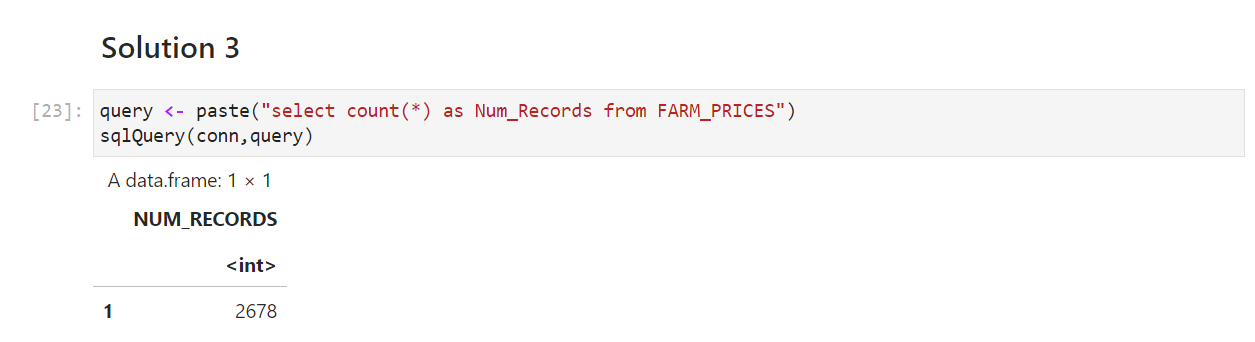

In [23]:
Query = "select count(*) as Num_Records from FARM_PRICES"

create = ibm_db.exec_immediate(conn, Query)
dictionary = ibm_db.fetch_both(create)
dictionary

{'NUM_RECORDS': 2678, 0: 2678}

## Problem 4
#### Which geographies are included in the farm prices dataset?

### Solution 4

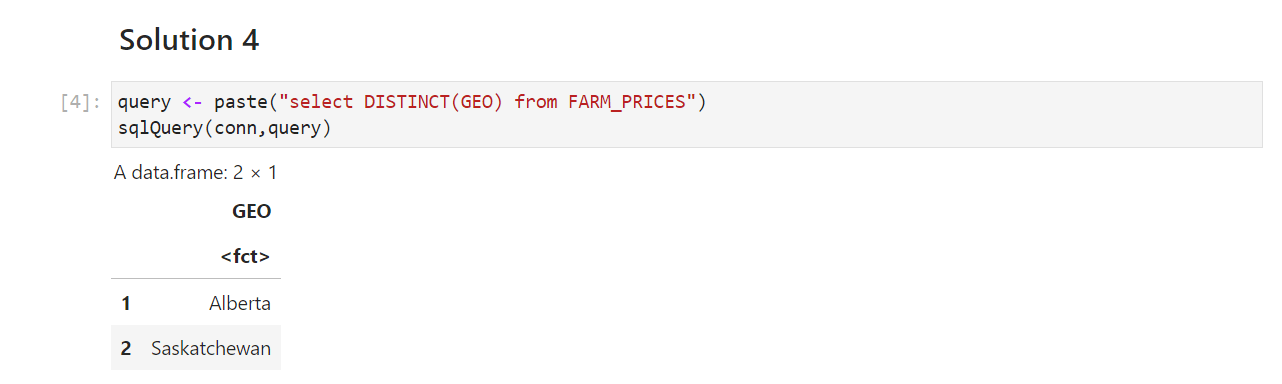

In [22]:
Query = "select DISTINCT(GEO) from FARM_PRICES"

create = ibm_db.exec_immediate(conn, Query)

dictionary = ibm_db.fetch_both(create)
dictionary

{'GEO': 'Alberta', 0: 'Alberta'}

## Problem 5
#### How many hectares of Rye were harvested in Canada in 1968?

### Solution 5

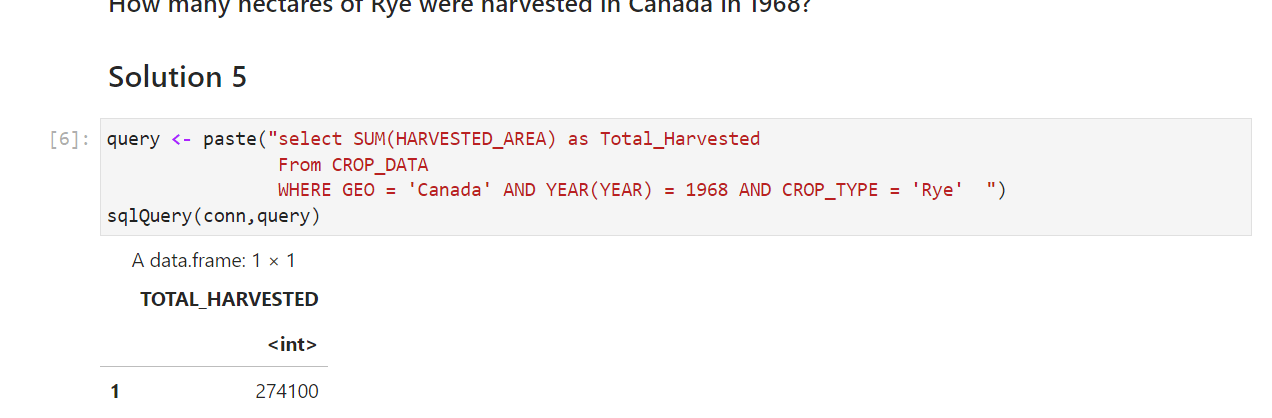

In [25]:
Query = "select SUM(HARVESTED_AREA) as Total_Harvested From CROP_DATA WHERE GEO = 'Canada' AND YEAR(YEAR) = 1968 AND CROP_TYPE = 'Rye'"

create = ibm_db.exec_immediate(conn, Query)

dictionary = ibm_db.fetch_both(create)
dictionary

{'TOTAL_HARVESTED': 274100, 0: 274100}

## Problem 6
#### Query and display the first 6 rows of the farm prices table for Rye.

### Solution 6

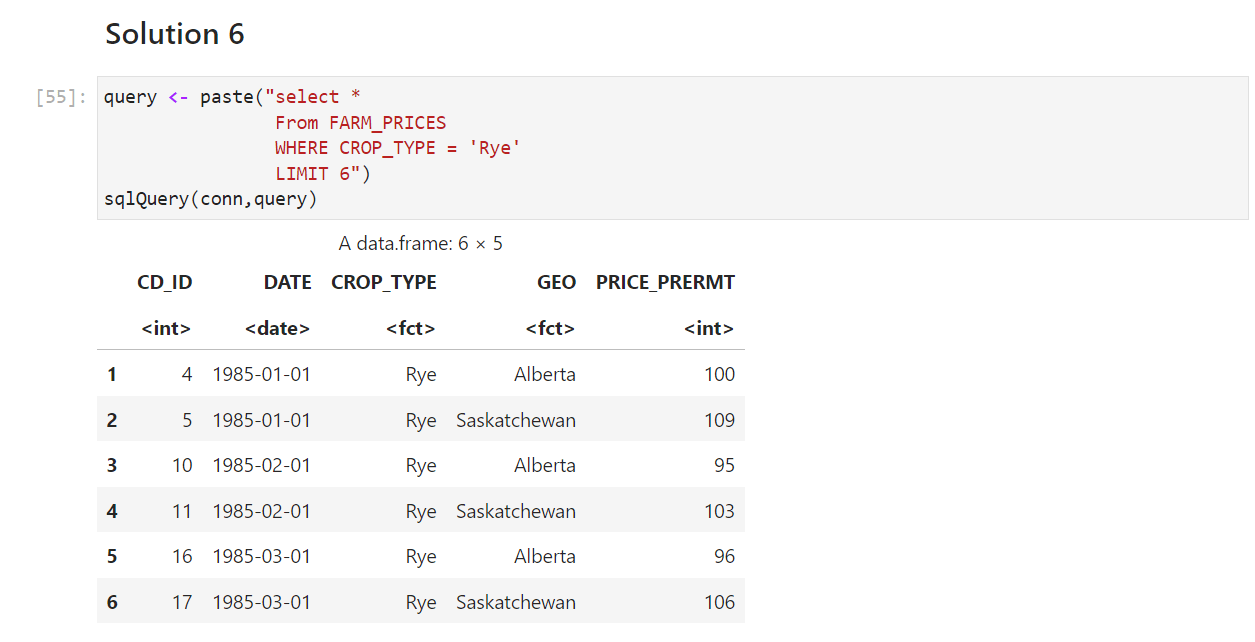

In [31]:
Query = "select * From FARM_PRICES WHERE CROP_TYPE = 'Rye'  LIMIT 6"

create = ibm_db.exec_immediate(conn, Query)

dictionary = ibm_db.fetch_both(create)
dictionary

{'CD_ID': 4,
 0: 4,
 'DATE': datetime.date(1985, 1, 1),
 1: datetime.date(1985, 1, 1),
 'CROP_TYPE': 'Rye',
 2: 'Rye',
 'GEO': 'Alberta',
 3: 'Alberta',
 'PRICE_PRERMT': 100,
 4: 100}

## Problem 7
#### Which provinces grew Barley? 

### Solution 7

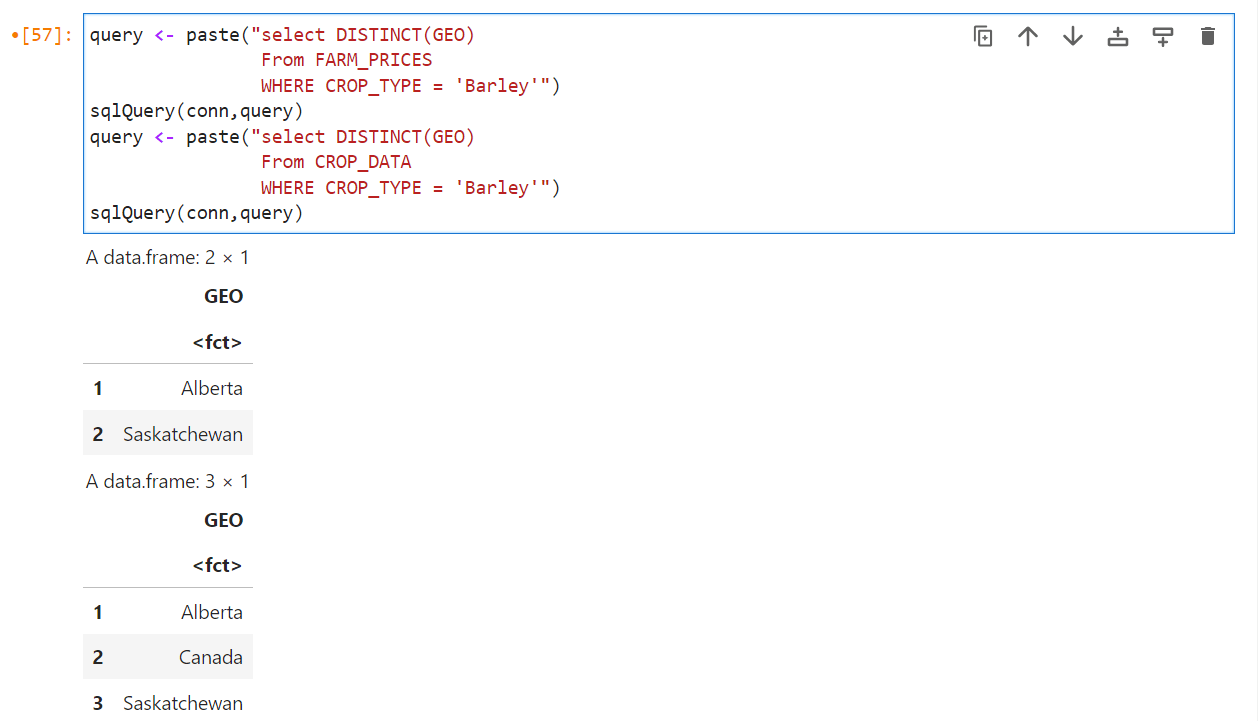

In [33]:
Query = "select DISTINCT(GEO) From FARM_PRICES WHERE CROP_TYPE = 'Barley'"

create = ibm_db.exec_immediate(conn, Query)

dictionary = ibm_db.fetch_both(create)
dictionary

{'GEO': 'Alberta', 0: 'Alberta'}

## Problem 8
#### Find the first and last dates for the farm prices data.

### Solution 8

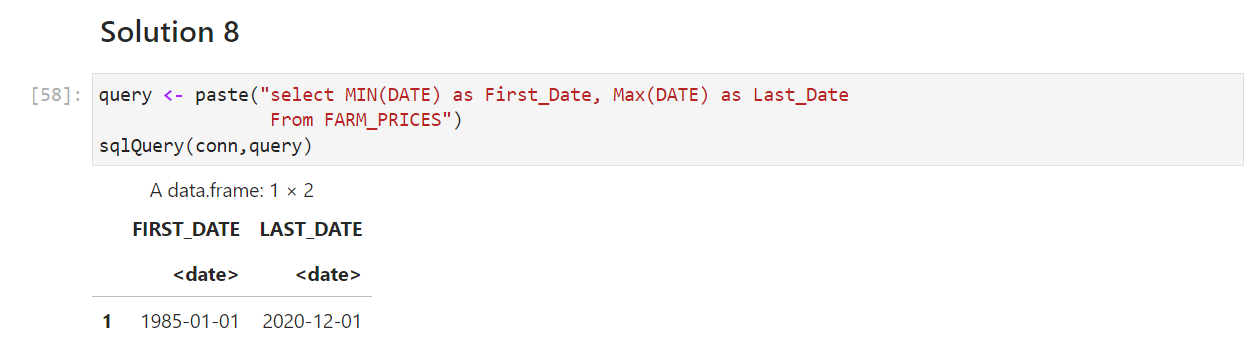

In [36]:
Query = "select MIN(DATE) as First_Date, Max(DATE) as Last_Date From FARM_PRICES"

create = ibm_db.exec_immediate(conn, Query)

dictionary = ibm_db.fetch_both(create)
dictionary

{'FIRST_DATE': datetime.date(1985, 1, 1),
 0: datetime.date(1985, 1, 1),
 'LAST_DATE': datetime.date(2020, 12, 1),
 1: datetime.date(2020, 12, 1)}

## Problem 9
#### Which crops have ever reached a farm price greater than or equal to &#0036;350 per metric tonne?

### Solution 9

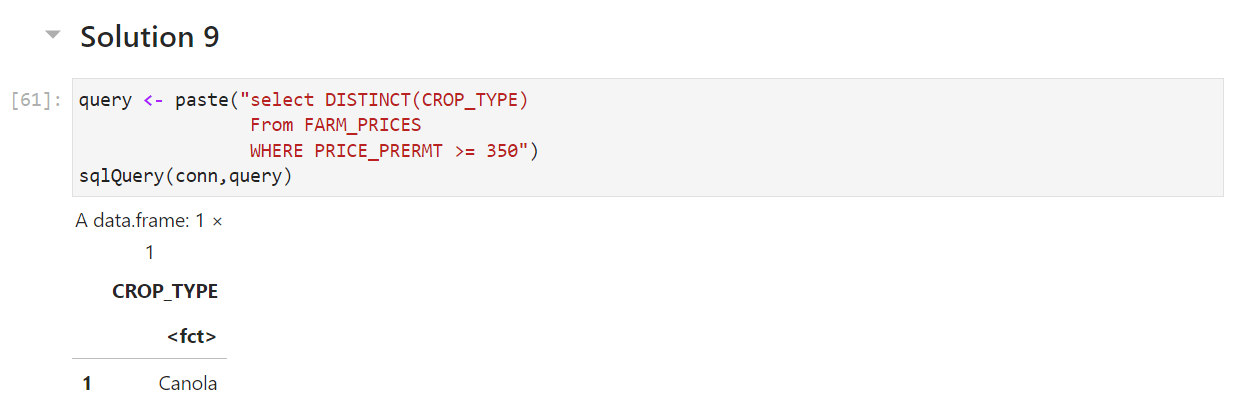

In [37]:
Query = "select DISTINCT(CROP_TYPE) From FARM_PRICES WHERE PRICE_PRERMT >= 350"

create = ibm_db.exec_immediate(conn, Query)

dictionary = ibm_db.fetch_both(create)
dictionary

{'CROP_TYPE': 'Canola', 0: 'Canola'}

## Problem 10
#### Rank the crop types harvested in Saskatchewan in the year 2000 by their average yield. Which crop performed best? 

### Solution 10

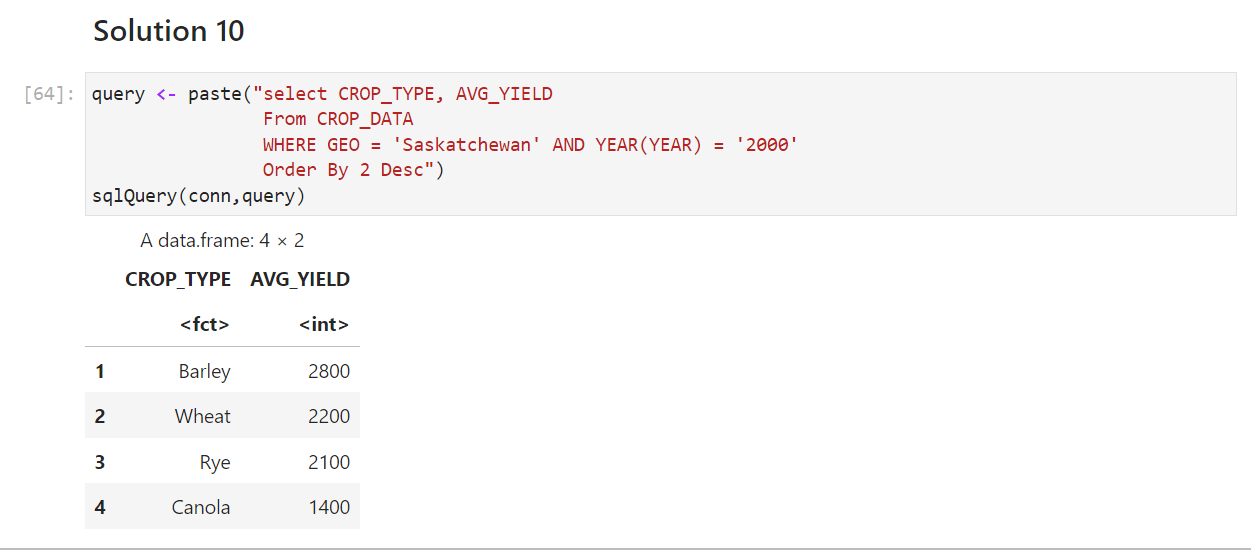

In [43]:
Query = "select CROP_TYPE, AVG_YIELD From CROP_DATA WHERE GEO = 'Saskatchewan' AND YEAR(YEAR) = '2000' Order By 2 Desc"

create = ibm_db.exec_immediate(conn, Query)

dictionary = ibm_db.fetch_both(create)
dictionary

{'CROP_TYPE': 'Barley', 0: 'Barley', 'AVG_YIELD': 2800, 1: 2800}

## Problem 11
#### Rank the crops and geographies by their average yield (KG per hectare) since the year 2000. Which crop and province had the highest average yield since the year 2000? 

### Solution 11

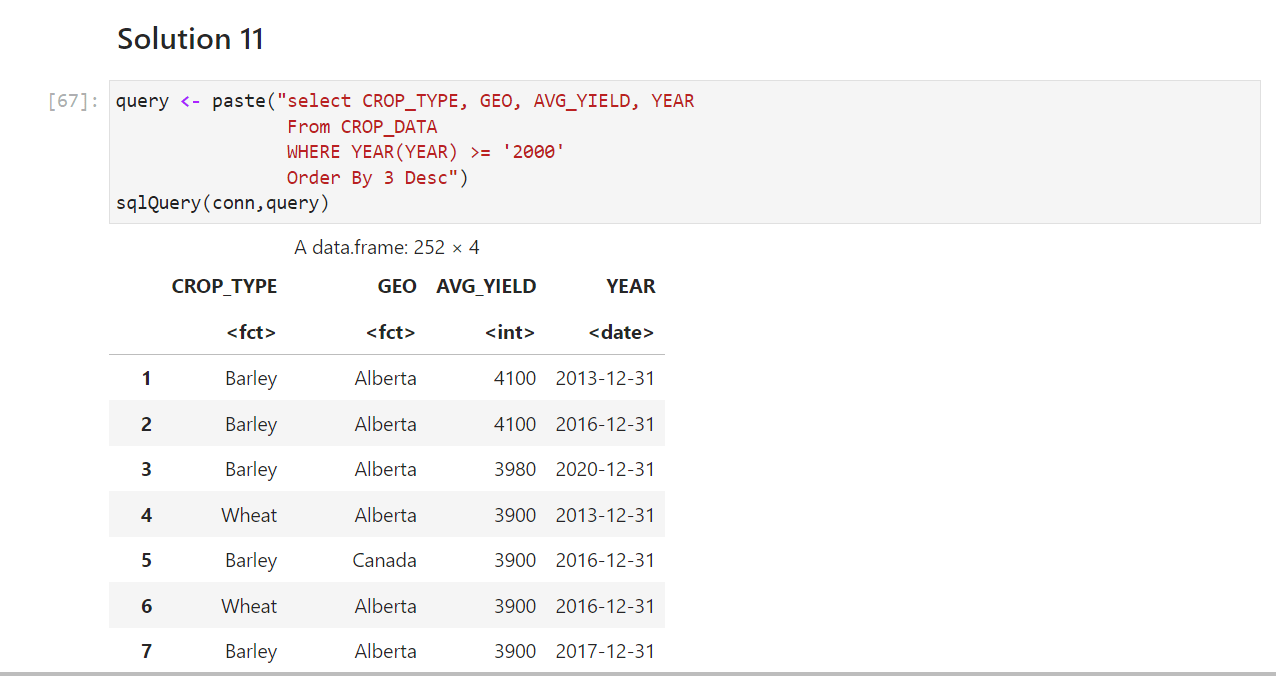

In [44]:
Query = "select CROP_TYPE, GEO, AVG_YIELD, YEAR From CROP_DATA WHERE YEAR(YEAR) >= '2000' Order By 3 Desc Limit 10"

create = ibm_db.exec_immediate(conn, Query)

dictionary = ibm_db.fetch_both(create)
dictionary

{'CROP_TYPE': 'Barley',
 0: 'Barley',
 'GEO': 'Alberta',
 1: 'Alberta',
 'AVG_YIELD': 4100,
 2: 4100,
 'YEAR': datetime.date(2013, 12, 31),
 3: datetime.date(2013, 12, 31)}

## Problem 12
#### Use a subquery to determine how much wheat was harvested in Canada in the most recent year of the data.

### Solution 12

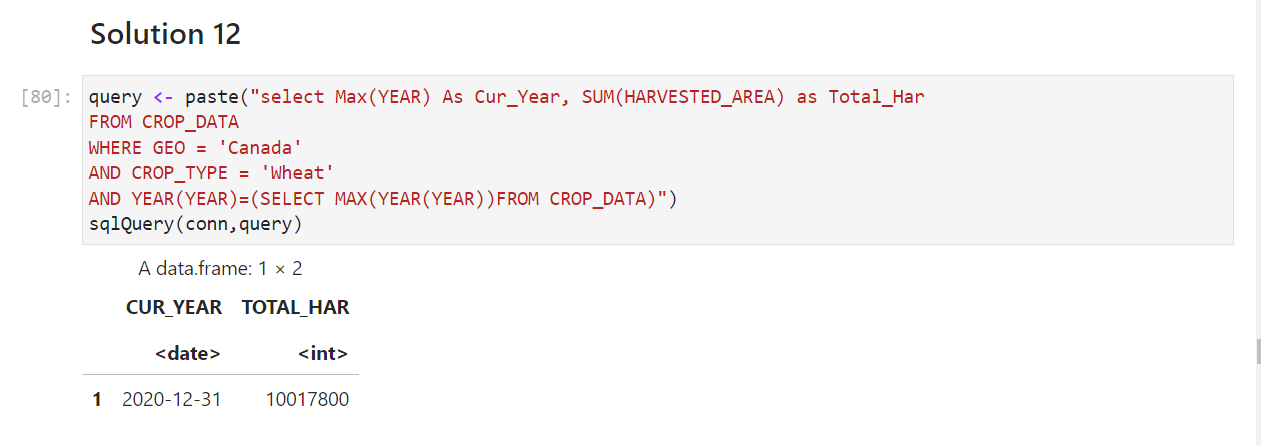

In [45]:
Query = "select Max(YEAR) As Cur_Year, SUM(HARVESTED_AREA) as Total_Har FROM CROP_DATA WHERE GEO = 'Canada' AND CROP_TYPE = 'Wheat'  AND YEAR(YEAR)=(SELECT MAX(YEAR(YEAR))FROM CROP_DATA)"

create = ibm_db.exec_immediate(conn, Query)

dictionary = ibm_db.fetch_both(create)
dictionary

{'CUR_YEAR': datetime.date(2020, 12, 31),
 0: datetime.date(2020, 12, 31),
 'TOTAL_HAR': 10017800,
 1: 10017800}

## Problem 13
#### Use an implicit inner join to calculate the monthly price per metric tonne of Canola grown in Saskatchewan in both Canadian and US dollars. Display the most recent 6 months of the data.

### Solution 13

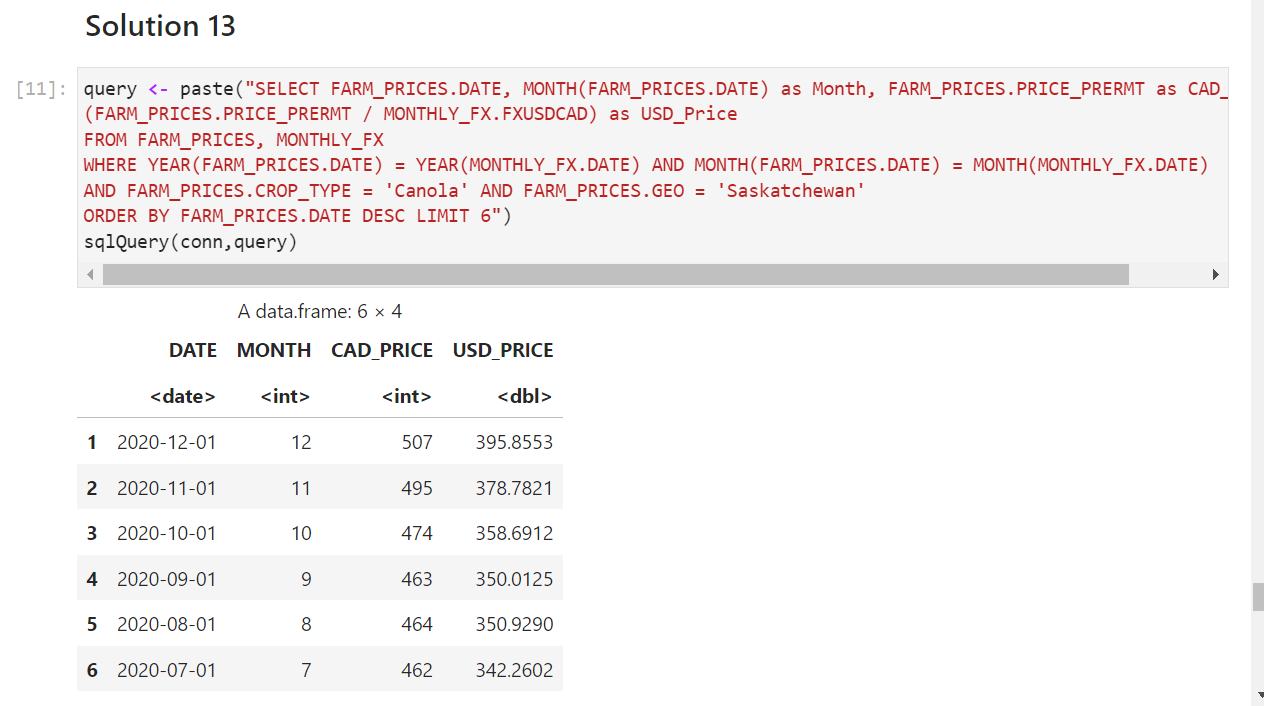

In [50]:
Query = "SELECT FARM_PRICES.DATE, MONTH(FARM_PRICES.DATE) as Month, FARM_PRICES.PRICE_PRERMT as USD_Price, (FARM_PRICES.PRICE_PRERMT * MONTHLY_FX.FXUSDCAD) as CAD_Price FROM FARM_PRICES, MONTHLY_FX WHERE YEAR(FARM_PRICES.DATE) = YEAR(MONTHLY_FX.DATE) AND MONTH(FARM_PRICES.DATE) = MONTH(MONTHLY_FX.DATE) AND FARM_PRICES.CROP_TYPE = 'Canola' AND FARM_PRICES.GEO = 'Saskatchewan' ORDER BY FARM_PRICES.DATE DESC LIMIT 6"

create = ibm_db.exec_immediate(conn, Query)

dictionary = ibm_db.fetch_both(create)
dictionary 

{'DATE': datetime.date(2020, 12, 1),
 0: datetime.date(2020, 12, 1),
 'MONTH': 12,
 1: 12,
 'USD_PRICE': 507,
 2: 507,
 'CAD_PRICE': 649.351086974144,
 3: 649.351086974144}

In [56]:
# Close Database Connection
ibm_db.close(conn)

True